<a href="https://colab.research.google.com/github/imranrahman1997/Neural-Network-from-scratch/blob/main/Learn_Neural_Network_From_Scratch_with_Reuters_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Build a neural network with reuters dataset

In [1]:
#Import dataset from keras
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words = 10000)

In [2]:
print(len(train_data))
print(len(test_data))

8982
2246


In [3]:
print(train_data[0])

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


As we see, each example is a list of integers

If you want to decode the integers into text then could follow this code

In [4]:
word_index = reuters.get_word_index()
reverse_word_index = dict((value, key) for (key,value) in word_index.items())
decoded_newswire = ' '.join((reverse_word_index.get(i - 3, '?') for i in train_data[0]))

In [5]:
print(decoded_newswire)

? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


Integer list can not input in neural network, so we need to convert it into tensor vector. 

In [6]:
#Encoding the data
import numpy as np
def vectorize_sequences(sequences, dimensions = 10000):
  results = np.zeros((len(sequences), dimensions))
  for i , sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results

In [7]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

One hot label for test data

In [8]:
def to_one_hot(labels, dimension = 46): #output class is 46, that's why dimension is 46
  results = np.zeros((len(labels), dimension))
  for i, label in enumerate(labels):
    results[i, label] = 1
  return results

In [9]:
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

There is a built in function in keras

In [10]:
from keras.utils.np_utils import to_categorical
#Converts a class vector (integers) to binary class matrix.

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [11]:
#model defination
from keras import models
from keras import layers

model  = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax'))

In [12]:
model.compile(
    optimizer = 'rmsprop',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

In [13]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [14]:
history  = model.fit(
    partial_x_train,
    partial_y_train,
    epochs = 20,
    batch_size = 512,
    validation_data = (x_val, y_val)
)

Epoch 1/20
16/16 [==============================] - 0s 24ms/step - loss: 2.6086 - accuracy: 0.5197 - val_loss: 1.7080 - val_accuracy: 0.6450
Epoch 2/20
16/16 [==============================] - 0s 14ms/step - loss: 1.4213 - accuracy: 0.7027 - val_loss: 1.3280 - val_accuracy: 0.7100
Epoch 3/20
16/16 [==============================] - 0s 14ms/step - loss: 1.0737 - accuracy: 0.7691 - val_loss: 1.1495 - val_accuracy: 0.7560
Epoch 4/20
16/16 [==============================] - 0s 14ms/step - loss: 0.8438 - accuracy: 0.8188 - val_loss: 1.0627 - val_accuracy: 0.7670
Epoch 5/20
16/16 [==============================] - 0s 14ms/step - loss: 0.6763 - accuracy: 0.8539 - val_loss: 0.9852 - val_accuracy: 0.7860
Epoch 6/20
16/16 [==============================] - 0s 14ms/step - loss: 0.5397 - accuracy: 0.8870 - val_loss: 0.9477 - val_accuracy: 0.7990
Epoch 7/20
16/16 [==============================] - 0s 13ms/step - loss: 0.4343 - accuracy: 0.9107 - val_loss: 0.9235 - val_accuracy: 0.8040
Epoch 8/20
16

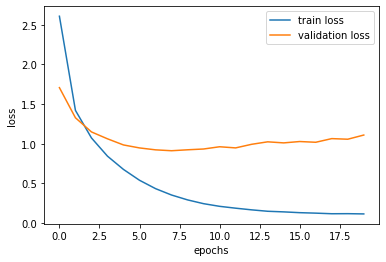

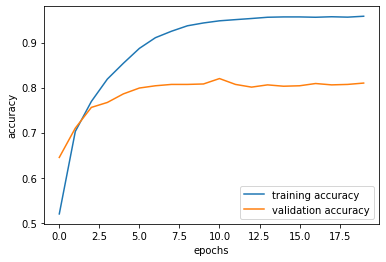

In [15]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label = 'train loss')
plt.plot(history.history['val_loss'], label = 'validation loss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

plt.plot(history.history['accuracy'], label = 'training accuracy')
plt.plot(history.history['val_accuracy'], label = 'validation accuracy')
plt.legend()
plt.xlabel('epochs')
plt.ylabel("accuracy")
plt.show()

The network begins to overfit after nine epochs. Let’s train a new network from
scratch for nine epochs and then evaluate it on the test set.

Retraining a model from scratch

In [16]:
model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax'))

model.compile(
    optimizer = 'rmsprop',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(
    partial_x_train,
    partial_y_train,
    epochs = 9,
    validation_data  = (x_val, y_val)
)
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
250/250 [==============================] - 1s 4ms/step - loss: 1.4283 - accuracy: 0.6908 - val_loss: 1.0323 - val_accuracy: 0.7840
Epoch 2/9
250/250 [==============================] - 1s 3ms/step - loss: 0.7253 - accuracy: 0.8396 - val_loss: 0.9110 - val_accuracy: 0.8140
Epoch 3/9
250/250 [==============================] - 1s 3ms/step - loss: 0.4570 - accuracy: 0.9014 - val_loss: 0.8864 - val_accuracy: 0.8310
Epoch 4/9
250/250 [==============================] - 1s 3ms/step - loss: 0.3154 - accuracy: 0.9300 - val_loss: 0.9115 - val_accuracy: 0.8260
Epoch 5/9
250/250 [==============================] - 1s 3ms/step - loss: 0.2500 - accuracy: 0.9442 - val_loss: 1.0606 - val_accuracy: 0.8140
Epoch 6/9
250/250 [==============================] - 1s 4ms/step - loss: 0.2147 - accuracy: 0.9494 - val_loss: 1.0530 - val_accuracy: 0.8120
Epoch 7/9
250/250 [==============================] - 1s 4ms/step - loss: 0.1900 - accuracy: 0.9513 - val_loss: 1.1734 - val_accuracy: 0.8230
Epoch 8/9
250

In [17]:
results

[1.5376198291778564, 0.7849510312080383]

In [18]:
predictions = model.predict(x_test)

In [19]:
predictions

array([[3.40358639e-08, 1.10241299e-05, 1.84715195e-11, ...,
        2.34042191e-12, 9.62901337e-16, 1.15991071e-12],
       [6.32533784e-07, 2.07219443e-07, 8.59786417e-13, ...,
        1.54665094e-21, 1.06847786e-19, 2.72292551e-13],
       [3.74044866e-05, 8.38795900e-01, 3.07666232e-05, ...,
        7.26271321e-10, 5.47057111e-09, 2.10647749e-11],
       ...,
       [7.79401660e-07, 4.15625778e-04, 1.96338288e-08, ...,
        1.65275480e-07, 3.62664239e-11, 6.75514356e-09],
       [1.71771564e-04, 4.14179526e-02, 8.57059378e-03, ...,
        3.87763212e-05, 9.51151776e-07, 3.06470213e-07],
       [3.98740774e-08, 9.52607453e-01, 2.81386165e-05, ...,
        2.68267436e-10, 6.32136487e-13, 2.46767430e-14]], dtype=float32)

In [20]:
print(np.argmax(predictions[0]))

3


#Another way to handel labels
first we use one-hot method to handel labels  
now we use np.array to cast them as tensor

In [21]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

This time we will use sparse categorical entropy

In [22]:
model.compile(
    optimizer = 'rmsprop',
    loss = 'sparse_categorical_entropy',
    metrics =  ['acc']
)

**This new loss function is still mathematically the same as categorical_crossentropy;it just has a different interface.**

The importance of having sufficiently large intermediate layers
We mentioned earlier that because the final outputs are 46-dimensional, you should
avoid intermediate layers with many fewer than 46 hidden units. Now let’s see what
happens when you introduce an information bottleneck by having intermediate layers
that are significantly less than 46-dimensional: for example, 4-dimensional.

In [23]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(
    optimizer = 'rmsprop',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

r = model.fit(
    partial_x_train,
    partial_y_train,
    epochs = 20,
    batch_size = 128,
    validation_data = (x_val, y_val)
)

Epoch 1/20
63/63 [==============================] - 0s 7ms/step - loss: 3.3366 - accuracy: 0.1206 - val_loss: 2.8700 - val_accuracy: 0.4010
Epoch 2/20
63/63 [==============================] - 0s 5ms/step - loss: 2.4074 - accuracy: 0.4465 - val_loss: 2.2469 - val_accuracy: 0.4590
Epoch 3/20
63/63 [==============================] - 0s 5ms/step - loss: 1.9294 - accuracy: 0.4883 - val_loss: 1.9570 - val_accuracy: 0.4750
Epoch 4/20
63/63 [==============================] - 0s 5ms/step - loss: 1.5543 - accuracy: 0.5781 - val_loss: 1.6001 - val_accuracy: 0.6370
Epoch 5/20
63/63 [==============================] - 0s 5ms/step - loss: 1.2611 - accuracy: 0.6803 - val_loss: 1.5101 - val_accuracy: 0.6520
Epoch 6/20
63/63 [==============================] - 0s 5ms/step - loss: 1.1421 - accuracy: 0.6899 - val_loss: 1.4783 - val_accuracy: 0.6590
Epoch 7/20
63/63 [==============================] - 0s 5ms/step - loss: 1.0651 - accuracy: 0.7053 - val_loss: 1.4658 - val_accuracy: 0.6700
Epoch 8/20
63/63 [==

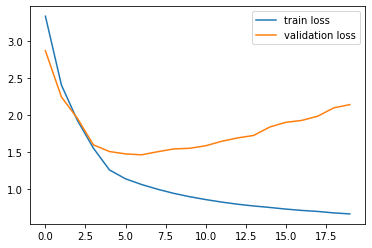

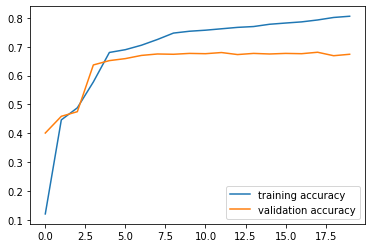

In [24]:
plt.plot(r.history['loss'], label = 'train loss')
plt.plot(r.history['val_loss'], label = 'validation loss')
plt.legend()
plt.show()

plt.plot(r.history['accuracy'], label = 'training accuracy')
plt.plot(r.history['val_accuracy'], label = 'validation accuracy')
plt.legend()
plt.show()

In [25]:
model.evaluate(x_test, one_hot_test_labels)

71/71 [==============================] - 0s 3ms/step - loss: 2.3524 - accuracy: 0.6612


[2.352412223815918, 0.6611754298210144]

The network now peaks at ~69% validation accuracy. This drop
is mostly due to the fact that you’re trying to compress a lot of information (enough
information to recover the separation hyperplanes of 46 classes) into an intermediate
space that is too low-dimensional. The network is able to cram most of the necessary
information into these eight-dimensional representations, but not all of it

**lets try with 128 hidden units**

In [26]:
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=128,
validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 1s 8ms/step - loss: 1.5662 - accuracy: 0.6706 - val_loss: 1.1155 - val_accuracy: 0.7500
Epoch 2/20
63/63 [==============================] - 0s 6ms/step - loss: 0.7605 - accuracy: 0.8373 - val_loss: 0.9495 - val_accuracy: 0.7970
Epoch 3/20
63/63 [==============================] - 0s 6ms/step - loss: 0.4602 - accuracy: 0.9048 - val_loss: 0.8941 - val_accuracy: 0.8110
Epoch 4/20
63/63 [==============================] - 0s 6ms/step - loss: 0.3051 - accuracy: 0.9320 - val_loss: 0.9256 - val_accuracy: 0.8060
Epoch 5/20
63/63 [==============================] - 0s 6ms/step - loss: 0.2363 - accuracy: 0.9446 - val_loss: 0.9528 - val_accuracy: 0.8060
Epoch 6/20
63/63 [==============================] - 0s 6ms/step - loss: 0.1930 - accuracy: 0.9496 - val_loss: 0.9369 - val_accuracy: 0.8170
Epoch 7/20
63/63 [==============================] - 0s 6ms/step - loss: 0.1678 - accuracy: 0.9534 - val_loss: 0.9120 - val_accuracy: 0.8240
Epoch 8/20
63/63 [==

In [27]:
model.evaluate(x_test, one_hot_test_labels)

71/71 [==============================] - 0s 3ms/step - loss: 1.9259 - accuracy: 0.7769


[1.925877571105957, 0.7769367694854736]

accuracy is 78%

Let's have try with 64, 128, 46

In [28]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(
    optimizer = 'rmsprop',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(
    partial_x_train,
    partial_y_train,
    epochs = 20,
    batch_size = 128,
    validation_data = (x_val, y_val)
)

Epoch 1/20
63/63 [==============================] - 0s 7ms/step - loss: 1.7253 - accuracy: 0.6245 - val_loss: 1.2329 - val_accuracy: 0.7260
Epoch 2/20
63/63 [==============================] - 0s 6ms/step - loss: 0.9332 - accuracy: 0.7942 - val_loss: 0.9944 - val_accuracy: 0.7900
Epoch 3/20
63/63 [==============================] - 0s 5ms/step - loss: 0.6122 - accuracy: 0.8676 - val_loss: 0.9146 - val_accuracy: 0.8070
Epoch 4/20
63/63 [==============================] - 0s 5ms/step - loss: 0.4098 - accuracy: 0.9117 - val_loss: 0.8808 - val_accuracy: 0.8220
Epoch 5/20
63/63 [==============================] - 0s 6ms/step - loss: 0.2927 - accuracy: 0.9334 - val_loss: 0.9395 - val_accuracy: 0.8190
Epoch 6/20
63/63 [==============================] - 0s 6ms/step - loss: 0.2328 - accuracy: 0.9448 - val_loss: 0.9633 - val_accuracy: 0.8260
Epoch 7/20
63/63 [==============================] - 0s 6ms/step - loss: 0.1937 - accuracy: 0.9501 - val_loss: 1.0383 - val_accuracy: 0.7860
Epoch 8/20
63/63 [==

In [29]:
model.evaluate(x_test, one_hot_test_labels)

71/71 [==============================] - 0s 3ms/step - loss: 1.7017 - accuracy: 0.7685


[1.7017035484313965, 0.7684773206710815]

increase a little bit

In [30]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(
    optimizer = 'rmsprop',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(
    partial_x_train,
    partial_y_train,
    epochs = 20,
    batch_size = 128,
    validation_data = (x_val, y_val)
)

Epoch 1/20
63/63 [==============================] - 0s 8ms/step - loss: 1.7687 - accuracy: 0.6027 - val_loss: 1.2648 - val_accuracy: 0.7100
Epoch 2/20
63/63 [==============================] - 0s 6ms/step - loss: 0.9668 - accuracy: 0.7849 - val_loss: 1.0409 - val_accuracy: 0.7670
Epoch 3/20
63/63 [==============================] - 0s 6ms/step - loss: 0.6258 - accuracy: 0.8584 - val_loss: 0.9596 - val_accuracy: 0.7910
Epoch 4/20
63/63 [==============================] - 0s 6ms/step - loss: 0.4159 - accuracy: 0.9072 - val_loss: 1.0030 - val_accuracy: 0.7810
Epoch 5/20
63/63 [==============================] - 0s 6ms/step - loss: 0.2973 - accuracy: 0.9335 - val_loss: 1.0117 - val_accuracy: 0.8100
Epoch 6/20
63/63 [==============================] - 0s 5ms/step - loss: 0.2329 - accuracy: 0.9440 - val_loss: 1.0161 - val_accuracy: 0.8020
Epoch 7/20
63/63 [==============================] - 0s 6ms/step - loss: 0.1912 - accuracy: 0.9516 - val_loss: 1.3169 - val_accuracy: 0.7650
Epoch 8/20
63/63 [==

In [31]:
model.evaluate(x_test, one_hot_test_labels)

71/71 [==============================] - 0s 3ms/step - loss: 2.0299 - accuracy: 0.7707


[2.0298850536346436, 0.7707034945487976]